In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from NeuralNetwork.dense import Dense
from NeuralNetwork.activations import Sigmoid,Softmax
from NeuralNetwork.losses import mse, mse_prime
from NeuralNetwork.network import predict
from tqdm import tqdm


In [7]:
def train(network, loss, loss_prime, x_train, y_train,x_test,y_test, epochs = 1000, learning_rate = 0.01, verbose = True):
    error_TS = []
    acc_TS = []
    val_error_TS = []
    val_acc_TS = []
    for e in range(epochs):
        error = 0
        acc =0
        val_error = 0
        val_acc = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)
            if np.argmax(y)==np.argmax(output):
                acc+=1
            # error

            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        for x, y in zip(x_test, y_test):
            output = predict(network, x)
            if np.argmax(y)==np.argmax(output):
                val_acc+=1
            val_error += loss(y, output)
        
        error /= len(x_train)
        acc /=len(x_train)
        val_error /= len(x_test)
        val_acc /=len(x_test)

        if verbose:
            print(f"{e + 1}/{epochs}, error={round(error,4)}, accuracy={round(acc,4)}, val_error={round(val_error,4)}, val_accuracy={round(val_acc,4)}")
        error_TS.append(error)
        acc_TS.append(acc)
        val_error_TS.append(val_error)
        val_acc_TS.append(val_acc)
    return [error_TS,acc_TS,val_error_TS,val_acc_TS]


In [8]:
df_train = pd.read_csv("./dataset/MNIST.csv")

In [9]:
Y_test,X_test =  df_train.iloc[:2000, :1], df_train.iloc[:2000, 1:]
Y_train,X_train = df_train.iloc[2000:, :1], df_train.iloc[2000:, 1:]

In [10]:
X_in = np.reshape(X_train,X_train.shape +(1,))
Y_in = np.squeeze(np.eye(10)[Y_train])
Y_in = np.reshape(Y_in,Y_in.shape +(1,))
X_out = np.reshape(X_test,X_test.shape +(1,))
Y_out = np.squeeze(np.eye(10)[Y_test])
Y_out = np.reshape(Y_out,Y_out.shape +(1,))

In [11]:

NN = [Dense(784,128),
      Sigmoid(),
      Dense(128,10),
      Softmax()
      ]

metrics = train(NN, mse, mse_prime, x_train=X_in,y_train=Y_in,x_test=X_out,y_test=Y_out, epochs=100, learning_rate=0.01)


d:\GITHUB\ELL784\Assignment1\NeuralNetwork\activations.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


1/100, error=0.1421, accuracy=0.1628, val_error=0.126, val_accuracy=0.243
2/100, error=0.1204, accuracy=0.2731, val_error=0.1099, val_accuracy=0.338
3/100, error=0.1049, accuracy=0.3648, val_error=0.0964, val_accuracy=0.4145
4/100, error=0.0951, accuracy=0.4147, val_error=0.0891, val_accuracy=0.4475
5/100, error=0.0846, accuracy=0.4693, val_error=0.0795, val_accuracy=0.501
6/100, error=0.0759, accuracy=0.5236, val_error=0.0713, val_accuracy=0.5515
7/100, error=0.0692, accuracy=0.5622, val_error=0.0641, val_accuracy=0.5995
8/100, error=0.0629, accuracy=0.6021, val_error=0.0612, val_accuracy=0.612
9/100, error=0.0583, accuracy=0.6318, val_error=0.0567, val_accuracy=0.6435
10/100, error=0.0541, accuracy=0.6565, val_error=0.0522, val_accuracy=0.671
11/100, error=0.0517, accuracy=0.6732, val_error=0.0508, val_accuracy=0.6755
12/100, error=0.0498, accuracy=0.6841, val_error=0.0495, val_accuracy=0.6885
13/100, error=0.0482, accuracy=0.6948, val_error=0.047, val_accuracy=0.7055
14/100, error=0

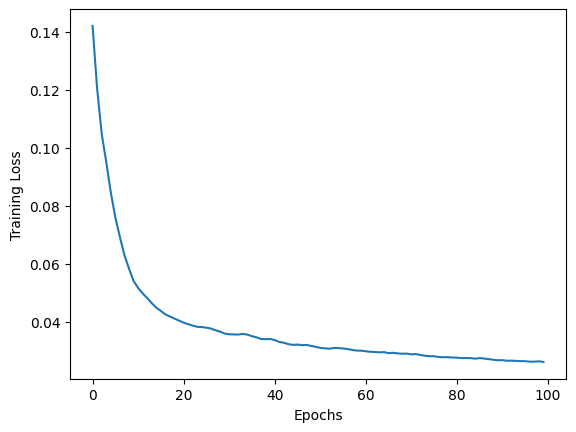

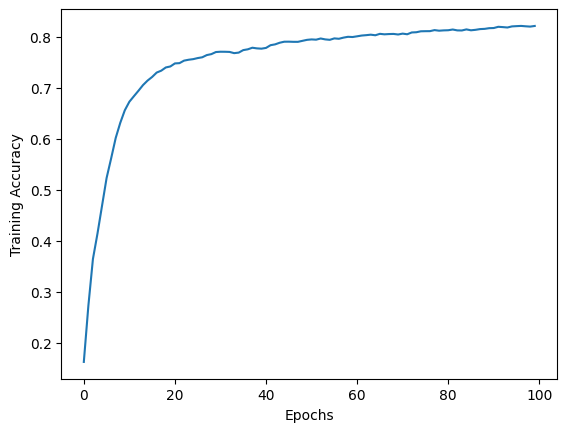

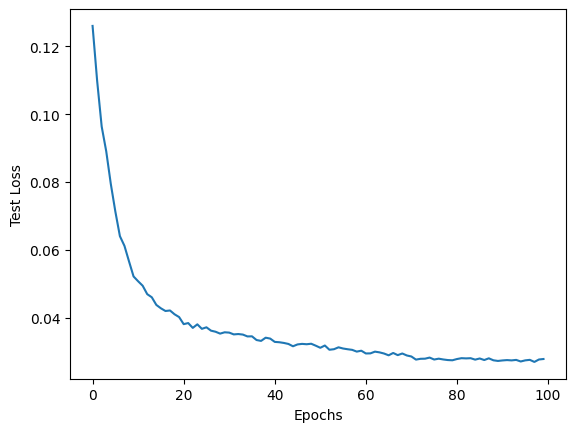

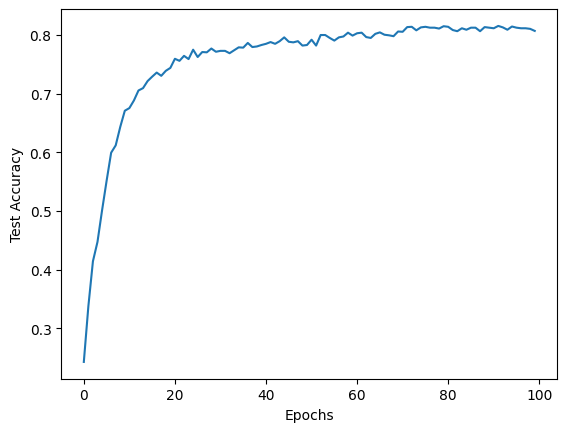

In [12]:
metrics_names = ['Training Loss','Training Accuracy','Test Loss','Test Accuracy']
for i in range(len(metrics_names)):
    plt.plot(metrics[i])
    plt.xlabel("Epochs")
    plt.ylabel(metrics_names[i])
    plt.savefig("./graph/MNIST_{}.png".format(metrics_names[i]))
    plt.show()